## Colour identification in an image 

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

### Reading an image

In [15]:
path_img = 'C:/Users/aish0/OneDrive/Documents/College study/IDMP/Project/Pattern recognition/data/test/full pants+men_s+stripes30.jpg'

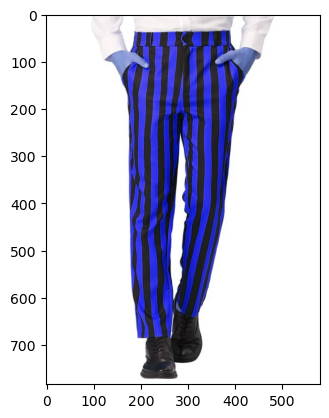

In [16]:
image = cv2.imread(path_img)
plt.imshow(image)

The colours in this image looks a bit different becasue opencv reads colours in BGR sequence. If we convert it into RGB and then view it, it can be viewed as is.

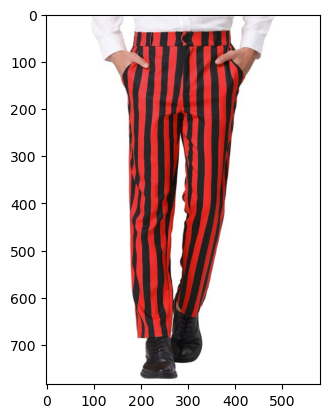

In [17]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Obtaining colours

In [18]:
def get_image(path):
    image = cv2.imread(path)
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

In [19]:
#Converting RGB values of colours into hex to be able to display on the pie chart 
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [20]:
def get_image_colours(number_of_colors, image, chart_display):
    
    #resizing the image
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA) 
    
    #reshaping array to be compatible with kmeans input
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #Kmeans clustering 
    cluster = KMeans(n_clusters = number_of_colors)
    labels = cluster.fit_predict(modified_image)
    
    counts = Counter(labels)

    center_colors = cluster.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (chart_display):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors
    

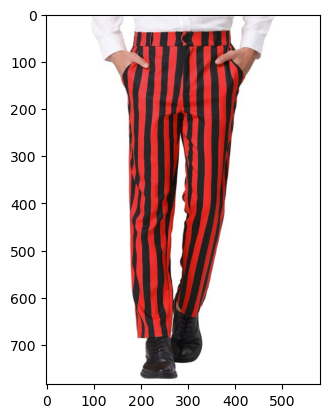

In [21]:
img= get_image(path_img)

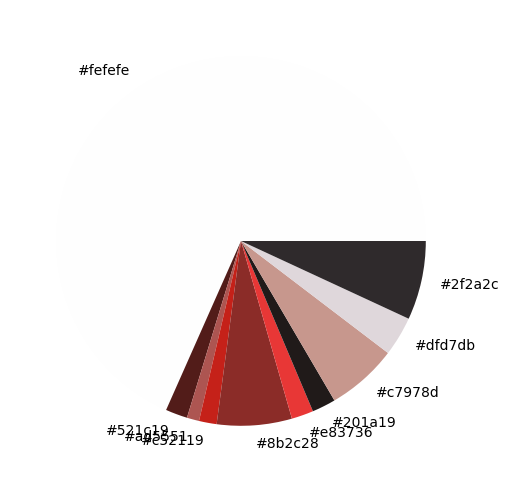

In [22]:
rgb_colors= get_image_colours(10, img, True)

In [23]:
rgb_colors

[array([254.60103497, 254.53283515, 254.65512428]),
 array([82.47776213, 28.53552023, 25.56208493]),
 array([173.88712712,  85.60279495,  81.40580489]),
 array([197.10540932,  33.50422603,  25.98043951]),
 array([139.7656148 ,  44.9562568 ,  40.96278564]),
 array([232.99885286,  55.2652901 ,  54.14333152]),
 array([32.2153319 , 26.71217415, 25.07679387]),
 array([199.85133566, 151.37669377, 141.77622919]),
 array([223.16883963, 215.82312038, 219.95002173]),
 array([47.09867209, 42.37556389, 44.67717136])]

### Get colour names 

In [25]:
from __future__ import print_function
import webcolors
from scipy.spatial import KDTree


def get_color_names(color_array):
    hexnames = webcolors.CSS3_HEX_TO_NAMES
    names = []
    positions = []
    
    for hex, name in hexnames.items():
        names.append(name)
        positions.append(webcolors.hex_to_rgb(hex))
        
    spacedb = KDTree(positions)
    
    color_names=[]
    for i in range(len(color_array)):
        querycolor = color_array[i]
        dist, index = spacedb.query(querycolor)
        color_names.append(names[index])
    return color_names
#          print('The color %r is closest to %s.'%(querycolor, names[index]))


In [26]:
get_color_names(rgb_colors)

['white',
 'maroon',
 'indianred',
 'firebrick',
 'brown',
 'crimson',
 'black',
 'rosybrown',
 'gainsboro',
 'darkslategray']